In [1]:
using LinearAlgebra
using Plots

# 1.

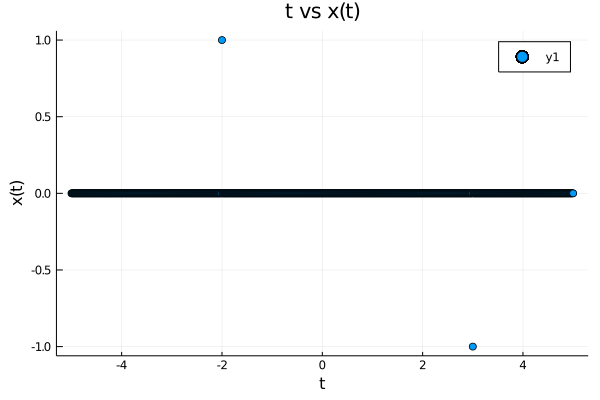

In [2]:
#Q1
#x(t) = d(t+2) - d(t-3)

#Defining Time vector with step of 0.01 over interval -5 to 5
t = -5:0.01:5;

#Defining zeros vector for delt1(t)
d1=zeros(length(t));
for i=1:length(t)
    if t[i]==-2
        d1[i]=1
    end
end

#Defining zeros vector for delt2(t)
d2=zeros(length(t));
for i=1:length(t)
    if t[i]==3
        d2[i]=1
    end
end

#x(t) = delt1(t) - delt2(t)
x = d1-d2;

#Plotting for t vs x(t)
scatter(t,x)
xlabel!("t")
ylabel!("x(t)")
title!("t vs x(t)")

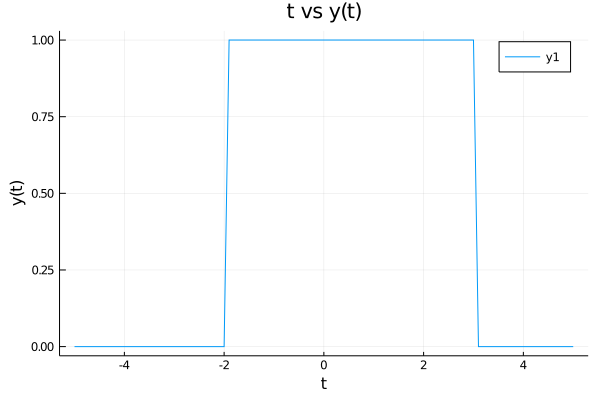

In [3]:
#Defining Time vector with step of 0.01 over interval -5 to 5
t = -5:0.1:5;
#Defining zeros vector for u1(t)
u1=zeros(length(t));
#Defining zeros vector for u2(t)
u2=zeros(length(t));

for i=1:length(t)
    if t[i]>-2
        u1[i]=1
    end
end

for i=1:length(t)
    if t[i]>3
        u2[i]=1
    end
end

#y(t) = u1(t) - u2(t)
y=u1-u2;

#Plotting for t vs y(t)
plot(t,y)
xlabel!("t")
ylabel!("y(t)")
title!("t vs y(t)")

In [4]:
#Symbolic representation of y(t) and Energy Expression
using SymPy
t = Sym("t");
y1(t) = 1^2;
y1(t)
integrate(y1)

x

In [5]:
#Computing the Energy for the signal y(t)
Energy(t) = integrate(y1, -2, 3)
Energy(t)

5

In [6]:
function RectFunc(a, t1, t2, b = -a, A = 1)
    #a is starting point
    #b is ending point
    #A is the amplitude
    #t1, t2 defines time interval starting and ending points
    t = t1 : 0.001 : t2;
    y = zeros(length(t));
    for i in 1:length(t)
        if(t[i] >= a && t[i] <= b)
            y[i] = 1;
        end
    end
    y = A.*y;
    return t, y;

end

#Creating function
a = -1;
b = 1;
A = 1;
#x(t)
#domain for x(t) is t belongs to [-1,1] 
time, yt1 = RectFunc(a, -3, 3, b, A);
#x(3t)
#domain for x(3t) is 3t belongs to [-1,1] => t belongs to [-1/3, 1/3]
time, yt2 = RectFunc(a/3, -3, 3, b/3, A);
t = Sym("t");
#The rectangular function in the interval [-1,1] has a value 1
y1(t) = 1^2;
E1(t) = integrate(y1, -1, 1);
E2(t) = integrate(y1, -1/3, 1/3);

In [7]:
E1(t)

2

In [8]:
E2(t)

0.666666666666667

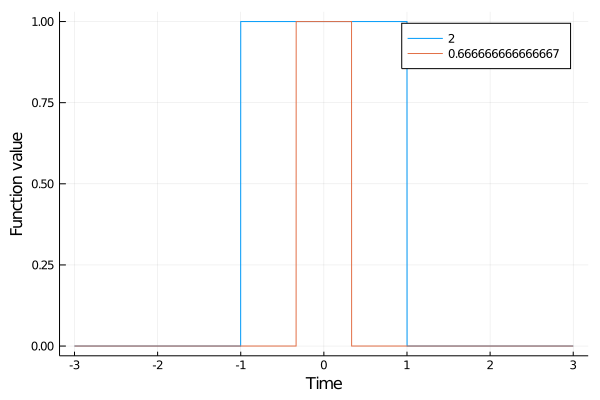

In [9]:
plot(time, yt1, label = E1(t))
plot!(time, yt2, label = E2(t))
xlabel!("Time")
ylabel!("Function value")

# 3.

In [1]:
using SymPy
x = Sym("x")
#Frequency of signal
freq = 1/2
f(x)= sign.(sin.(freq*2*pi*x));

In [2]:
L = 2
j = 1;
#Creating magnitude vector
magn =zeros(11)
for k = -5:5
    #At k = 0, FS is zero
    if(k==0)
        magn[j] = 0
    else
        #Finding 'an' and 'bn' for the values of k
        an=1/L*integrate(-cos(x*k*pi/L),-L,0)+1/L*integrate(cos(x*k*pi/L),0,L)
        bn =1/L*integrate(-sin(x*k*pi/L),-L,0)+1/L*integrate(sin(x*k*pi/L),0,L)
        #FS Coefficient
        cn = (an-bn*im)/2
        println("k :",k," cn:",cn)
        #Finding magnitude of complex number
        magn[j] = sqrt(real(cn)^2+imag(cn)^2)
        println("magnitude:",j," ",magn[j])
    end
        j = j + 1;
end
magn[6] = 0

k :-5 cn:0.4*I/pi
magnitude:1 0.12732395447351627
k :-4 cn:0
magnitude:2 0.0
k :-3 cn:0.666666666666667*I/pi
magnitude:3 0.21220659078919377
k :-2 cn:0
magnitude:4 0.0
k :-1 cn:2.0*I/pi
magnitude:5 0.6366197723675814
k :1 cn:-2.0*I/pi
magnitude:7 0.6366197723675814
k :2 cn:0
magnitude:8 0.0
k :3 cn:-0.666666666666667*I/pi
magnitude:9 0.21220659078919377
k :4 cn:0
magnitude:10 0.0
k :5 cn:-0.4*I/pi
magnitude:11 0.12732395447351627


0

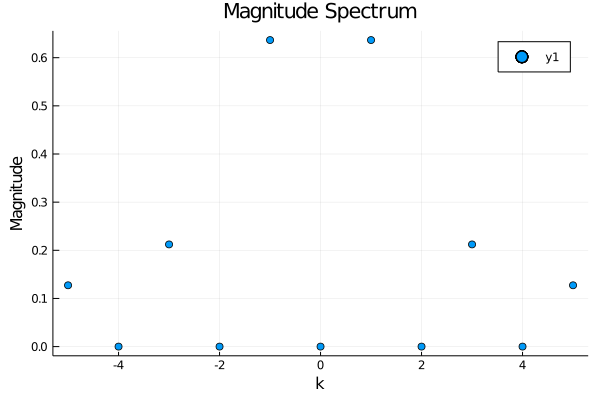

In [4]:
using Plots
scatter([k for k in -5:5], magn)
xlabel!("k")
ylabel!("Magnitude")
title!("Magnitude Spectrum")

# 4.

In [1]:
#Define starting point
st = -5;
#Define ending point
ed = 5;
#Define step
delt = 0.1;
#Define frequency
freq = 1/4;
#Define time
t = st:delt:ed;
#Define the y(t) function
y1 = sign.(sin.(2*pi*t*freq));
g(y) = convert(Float64,(t>=-2)&&(t<=2)).*y1;

In [2]:
using Plots
using FFTW
k = 1;
magn = zeros(length(t));
for i = 1:length(t)
    #Getting locations where we have (-2 <= t <= 2)
    magn[k] = convert(Float64,(t[i]>=-2)&&(t[i]<=2));
    k = k+1;
end

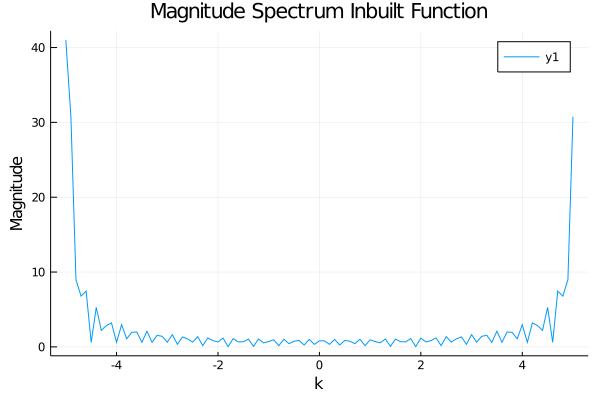

In [3]:
#Computing the spectrum and plotting
mag1 = abs.(fft(magn));
plot(t, mag1)
xlabel!("k")
ylabel!("Magnitude")
title!("Magnitude Spectrum Inbuilt Function")

In [32]:
#Fourier Transform on our own
using SymPy
function fourier_calc(ft, T, N)
    ak = zeros(2*N+1); #intialize a row vector of 2N+1 zeros
    t = Sym("t");
    w0=2*pi/T;
    for k = -N:N
        if(k!=0)
            # Julia index start only from 1
            ak[1+k+N] = 1/T * integrate(ft*exp(-1im*k*w0*t),(t, -T/2, T/2));
            # ak is fourier coefficient
        else
            ak[1+k+N] = (1/T)*integrate(t^0,(t,-T/2,T/2));
        end
    end
    return ak;
end

fourier_calc (generic function with 1 method)

In [33]:
#Defining heaviside function
function Heaviside(x)
    if(x >= 0)
        return 1;
    else
        return 0;
    end
end

Heaviside (generic function with 1 method)

In [34]:
#Defining time period, N for spectrum range, Symbol t and ft.
T = 4;
N = 5;
t = Sym("t");
ft = Heaviside(t - 2) - Heaviside(t + 2);
#Passing these values into the 
ck = fourier_calc(ft, T, N);

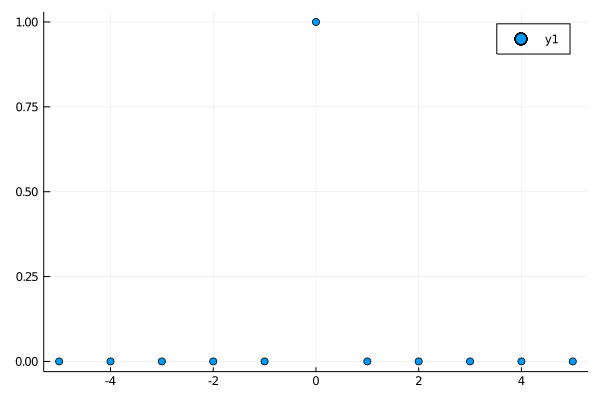

In [35]:
scatter(-N:N, ck)